In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import tensorflow as tf

In [2]:
! pip install tensorflow


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1.2 Feature engineering and preprocess data for input into the model


## Import the data

In [4]:
credit_df = pd.read_csv('creditcard.csv')

In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

### Scale the features so as to mitigate the biasness towards one feature

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [10]:
X = credit_df.iloc[:,:-1]
Y = credit_df.iloc[:,-1]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state=100, stratify = Y)

In [11]:

Y_train.head()

211885    0
12542     0
270932    0
30330     0
272477    0
Name: Class, dtype: int64

In [12]:
Y_test.value_counts()

Class
0    56864
1       98
Name: count, dtype: int64

In [13]:
nmscale = MinMaxScaler()
nmscale.fit(X_train)

MinMaxScaler()

In [14]:
X_train  = nmscale.transform(X_train)
X_test = nmscale.transform(X_test)

## 7.4 Create the model and the optimizer


In [67]:
def get_model():
    model = Sequential()
    model.add(Dense(30,input_shape=(30,),activation = 'relu'))
    model.add(Dense(15, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    print(model.summary())
    return model



In [68]:
# from tensorflow.keras import backend as K

# def recall_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred,0,1)))
#     possible_positives = K.sum(K.round(K.clip(y_true,0,1)))
#     recall = true_positives / (possible_positives + K.epsilon())
#     return recall

# def precision_m(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0 ,1)))
#     predicted_positives = K.sum(K.round(K.clip(y_pred,0,1)))
#     precision = true_positives / (predicted_positives + K.epsilon())
#     return precision

# def f1_m(y_true, y_pred):
#     precision = precision_m(y_true, y_pred)
#     recall = recall_m(y_true,y_pred)
#     return 2*((precision*recall)/(precision+recall+K.epsilon()))

from tensorflow.keras import backend as K
import tensorflow as tf

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

#get the model

model = get_model()

#compile the model
model.compile(optimizer = 'RMSProp', loss='binary_crossentropy',metrics=['acc',f1_m,precision_m,recall_m])

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481 (5.79 KB)

 Trainable params: 1,481 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

None


## 1.5 - Train the model


In [69]:
# fit the model
history = model.fit(X_train, Y_train,validation_split = 0.1, epochs =50,verbose =1,batch_size = 1000)

# evaluate the model
loss,accuracy,f1_score,precision,recall = model.evaluate(X_test,Y_test,verbose =0)

Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.9958 - f1_m: 0.0012 - loss: 0.1203 - precision_m: 6.0771e-04 - recall_m: 0.0143 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_loss: 0.0107 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - acc: 0.9984 - f1_m: 0.0000e+00 - loss: 0.0095 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_loss: 0.0097 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - acc: 0.9984 - f1_m: 0.0127 - loss: 0.0082 - precision_m: 0.0217 - recall_m: 0.0095 - val_acc: 0.9986 - val_f1_m: 0.2014 - val_loss: 0.0061 - val_precision_m: 0.3043 - val_recall_m: 0.1681
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - acc: 0.9987 - f1_m: 0.2619 - loss: 0.0057 - precision_m: 0.3823 - recall_m: 0.2205 - val_acc: 0.9989 - val_f1_m: 0.3304 - val_loss: 0.0048 - val_precision_m: 0.4783 - val_rec

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - acc: 0.9993 - f1_m: 0.6870 - loss: 0.0035 - precision_m: 0.7201 - recall_m: 0.6972 - val_acc: 0.9992 - val_f1_m: 0.5694 - val_loss: 0.0049 - val_precision_m: 0.5659 - val_recall_m: 0.5855
Epoch 31/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - acc: 0.9995 - f1_m: 0.6267 - loss: 0.0029 - precision_m: 0.6617 - recall_m: 0.6328 - val_acc: 0.9994 - val_f1_m: 0.5885 - val_loss: 0.0033 - val_precision_m: 0.6014 - val_recall_m: 0.5855
Epoch 32/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - acc: 0.9995 - f1_m: 0.6413 - loss: 0.0025 - precision_m: 0.6823 - recall_m: 0.6375 - val_acc: 0.9995 - val_f1_m: 0.5919 - val_loss: 0.0033 - val_precision_m: 0.6268 - val_recall_m: 0.5710
Epoch 33/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - acc: 0.9994 - f1_m: 0.5977 - loss: 0.0031 - precision_m: 0.6200 - recall_m: 0.6002 - val_acc: 0.9996 - val_f1_m: 0.6006 - val_loss: 0.0032 - val_precision_m: 0.6268 - val_recall_m: 0.5855
Epoch 34/50
206/206 ━━━━━━━━━━━━

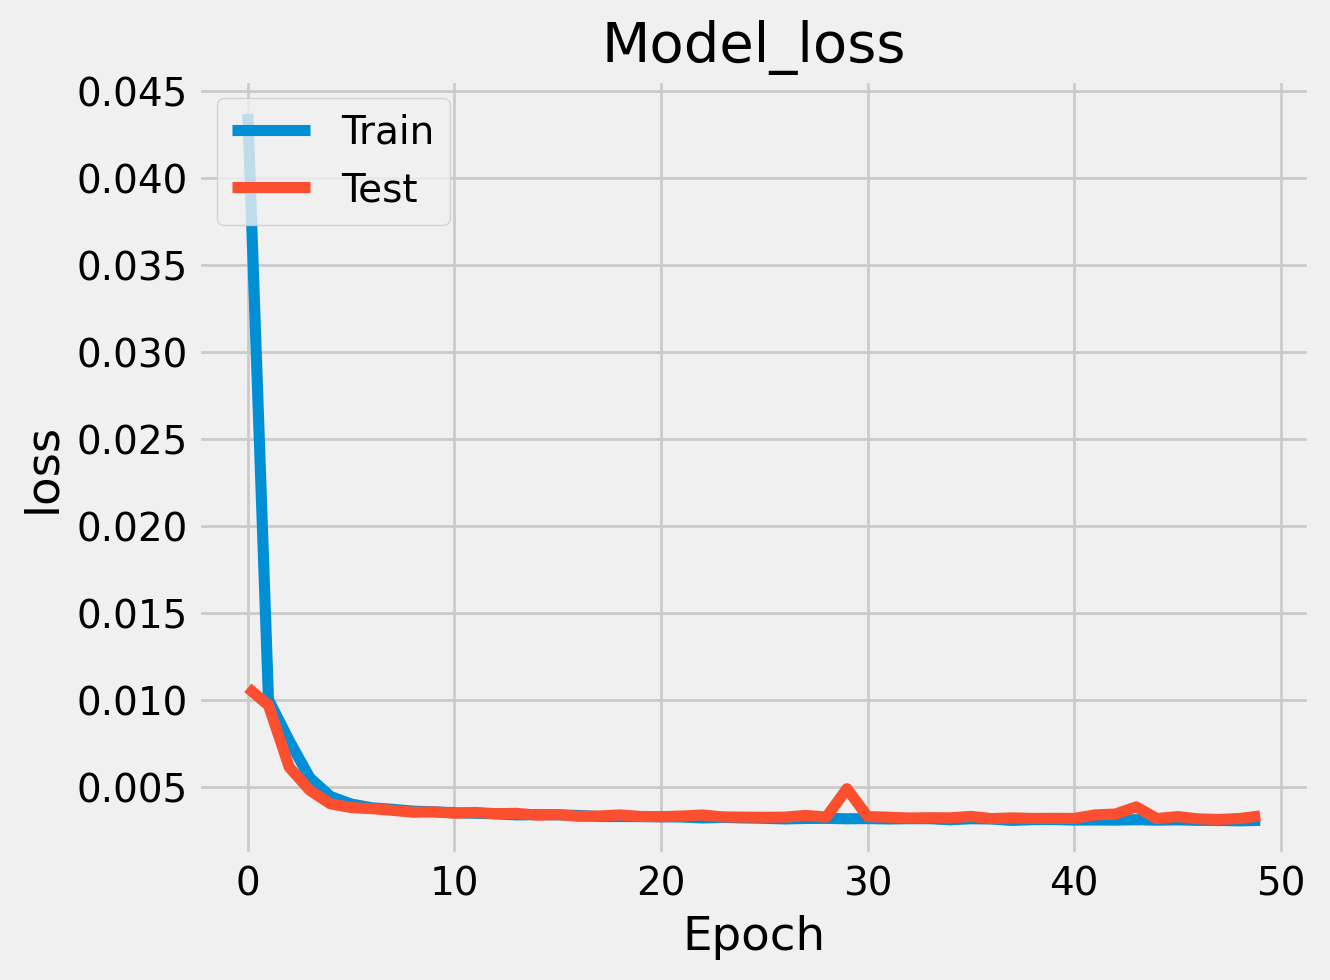

In [70]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc = 'upper left')
plt.show()

In [71]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm,annot=True,fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print('legitimate Transactions Detected (True Negatives)',cm[0][0])
    print('legitimate Transactions Incorrectly Detected (False Positives)',cm[0][1])
    print('Fradulent Transactions Missed (False Negatives)',cm[1][0])
    print('Fradulent Transactions Detected (True Positives)',cm[1][1])
    print('Total Fradulent Transactions',np.sum(cm[1]))


In [72]:
train_predictions_baseline = model.predict(X_train,batch_size=1000)
test_predictions_baseline = model.predict(X_test , batch_size=1000)

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step


In [73]:
import sklearn
from sklearn.metrics import confusion_matrix, roc_auc_score,classification_report , roc_curve

legitimate Transactions Detected (True Negatives) 56853
legitimate Transactions Incorrectly Detected (False Positives) 11
Fradulent Transactions Missed (False Negatives) 29
Fradulent Transactions Detected (True Positives) 69
Total Fradulent Transactions 98


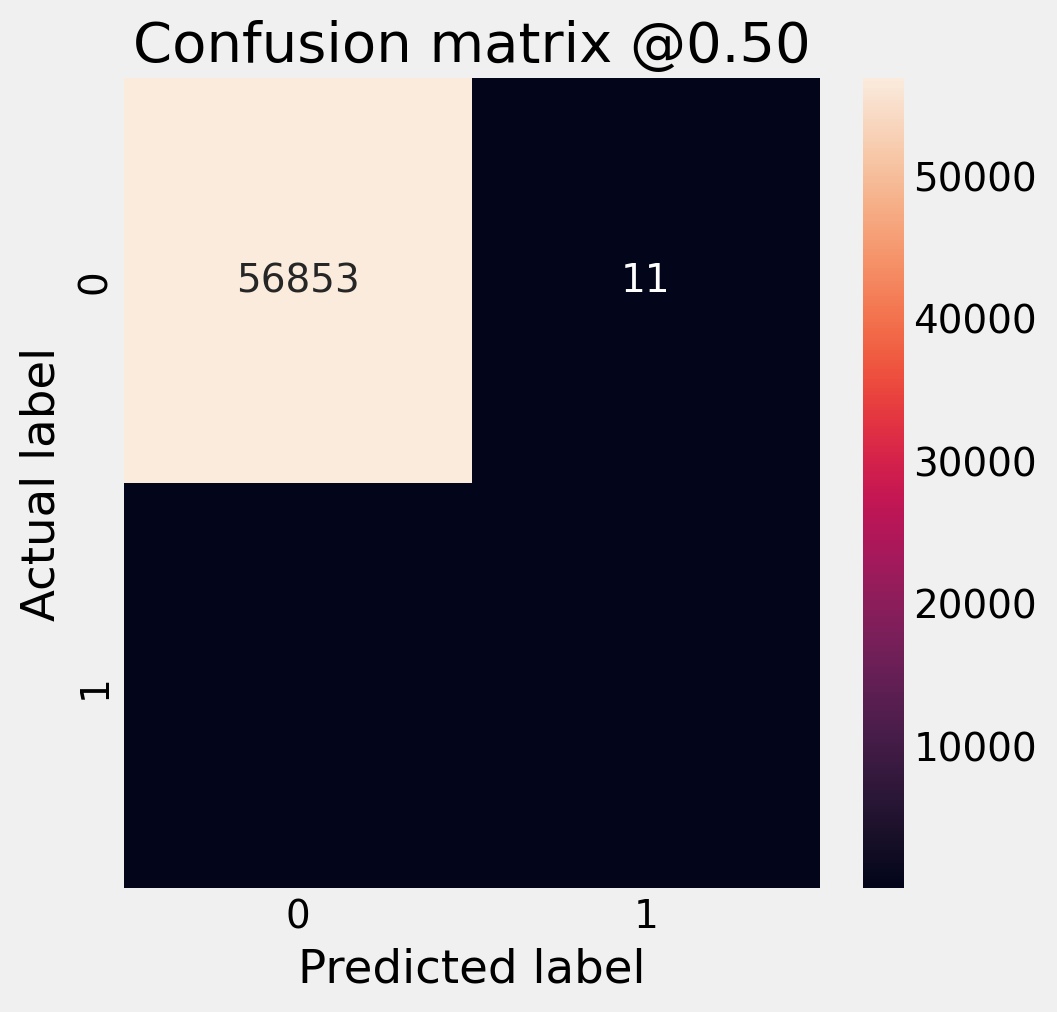

In [74]:
plot_cm(Y_test,test_predictions_baseline)

In [75]:
print(classification_report(Y_test,test_predictions_baseline>0.5))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.70      0.78        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [76]:
print(roc_auc_score(Y_test,test_predictions_baseline>0.5))

0.8519440943231541


## Handling Class Imbalances

#### Increase class weight of positive instances

In [77]:
# Scaling by total/2 helps keep the loss to a similar magnitude
# The sum of the weights of all example stays the same
neg, pos = np.bincount(credit_df['Class'])
total = neg + pos
weight_for_0 = (1/ neg)*(total)/2.0
weight_for_1 = (1/pos)*(total)/2.0

class_weight = {0: weight_for_0,
               1:weight_for_1}

print('Weight for class:0 {:.2f}'.format(weight_for_0))
print('Weight for class:1 {:.2f}'.format(weight_for_1))



Weight for class:0 0.50
Weight for class:1 289.44


In [79]:
weighted_model = get_model()

#compile the model 
weighted_model.compile(optimizer = 'RMSProp', loss= 'binary_crossentropy', metrics=['acc',f1_m,precision_m,recall_m])

# #fit the model
history = weighted_model.fit(X_train, Y_train, validation_split=0.1,epochs = 50,verbose=1,batch_size=1000)
                       
# # evaluate the model
                             
loss,accuracy,f1_score,precision,recall = weighted_model.evaluate(X_test,Y_test,verbose = 0)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 15)             │           465 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481 (5.79 KB)

 Trainable params: 1,481 (5.79 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step - acc: 0.9169 - f1_m: 0.0196 - loss: 0.3616 - precision_m: 0.0315 - recall_m: 0.0683 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_loss: 0.0113 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 2/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - acc: 0.9984 - f1_m: 0.0000e+00 - loss: 0.0107 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_loss: 0.0106 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - acc: 0.9984 - f1_m: 0.0000e+00 - loss: 0.0097 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - val_acc: 0.9983 - val_f1_m: 0.0000e+00 - val_loss: 0.0091 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - acc: 0.9984 - f1_m: 0.0236 - loss: 0.0085 - precision_m: 0.0330 - recall_m: 0.0196 - val_acc: 0.9986 - val_f1_m: 0.1580 - val_loss: 0.0069 - val_pr

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - acc: 0.9994 - f1_m: 0.6514 - loss: 0.0031 - precision_m: 0.6807 - recall_m: 0.6457 - val_acc: 0.9993 - val_f1_m: 0.5741 - val_loss: 0.0033 - val_precision_m: 0.5725 - val_recall_m: 0.5855
Epoch 31/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - acc: 0.9994 - f1_m: 0.6901 - loss: 0.0032 - precision_m: 0.7152 - recall_m: 0.7147 - val_acc: 0.9992 - val_f1_m: 0.5658 - val_loss: 0.0038 - val_precision_m: 0.5616 - val_recall_m: 0.5855
Epoch 32/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - acc: 0.9994 - f1_m: 0.6065 - loss: 0.0032 - precision_m: 0.6323 - recall_m: 0.6165 - val_acc: 0.9992 - val_f1_m: 0.5658 - val_loss: 0.0036 - val_precision_m: 0.5616 - val_recall_m: 0.5855
Epoch 33/50
206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - acc: 0.9993 - f1_m: 0.6004 - loss: 0.0041 - precision_m: 0.6383 - recall_m: 0.5954 - val_acc: 0.9995 - val_f1_m: 0.5919 - val_loss: 0.0034 - val_precision_m: 0.6268 - val_recall_m: 0.5710
Epoch 34/50
206/206 ━━━━━━━━━━━━

## 1.7 - Evaluate the final model and predict fraud using the model

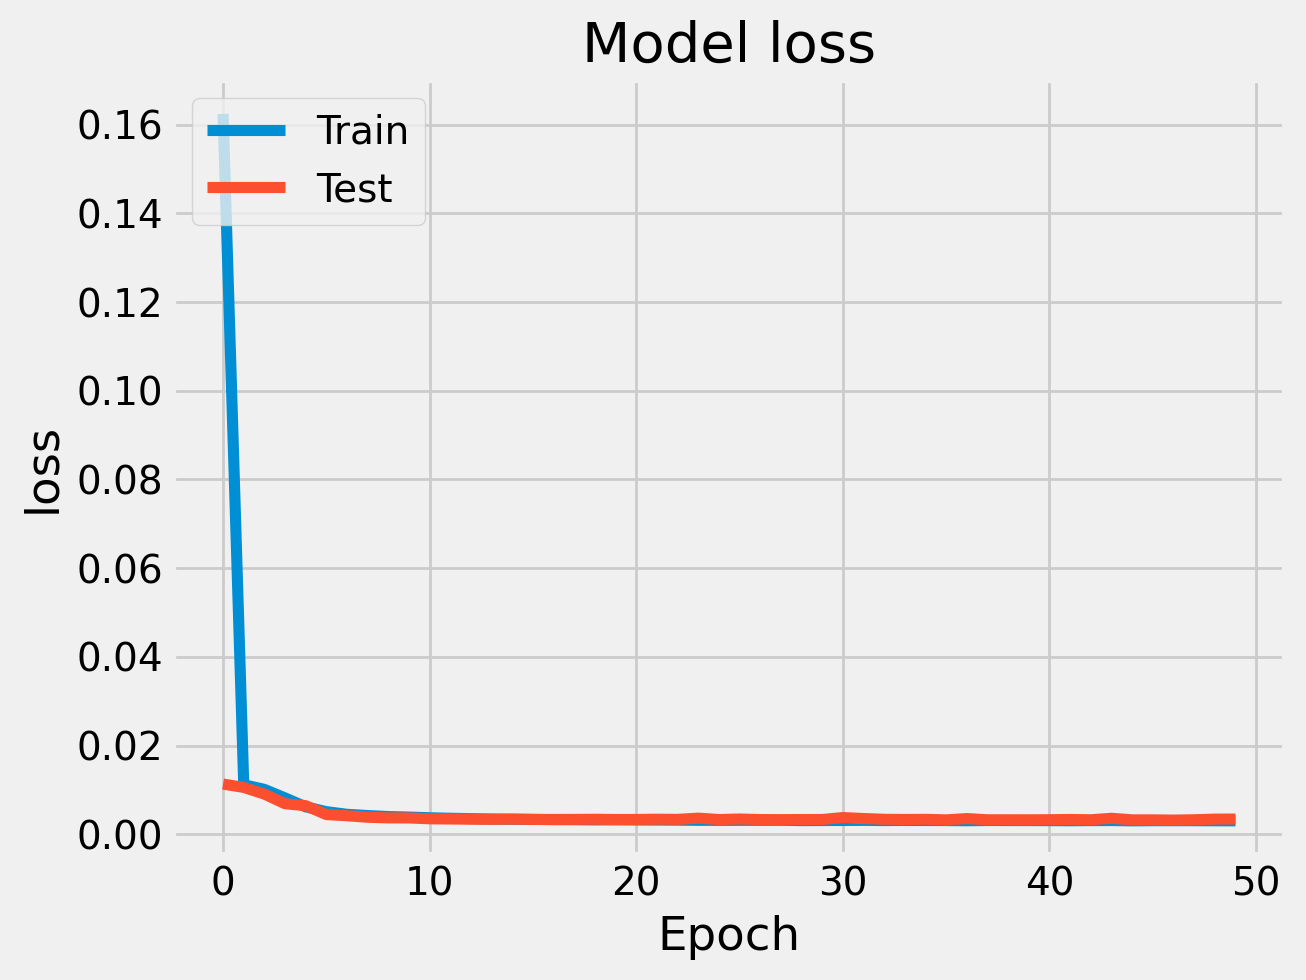

In [80]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [81]:
def find_optimal_cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model realted to event rate 
    Parameters
    -----------
    target : Matrix with dependent or target data where rows are observations
    predicted : Matrix with predicted data, where ,rows are observations
    Returns
    -------
    list type,with optimal cutoff value
    """
    
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf': pd.Series(tpr-(1-fpr),index= i),'threshold': pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    # Plot tpr vs 1 - fpr
    fig, ax = plt.subplots()
    plt.plot(tpr)
    plt.plot(1-fpr,color = 'red')
    plt.xlabel('1-False Psitive Rate')
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic")
    ax.set_xticklabels([])
    return list(roc_t['threshold'])

In [82]:
test_predictions_weighted = weighted_model.predict(X_test,batch_size = 1000)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


[0.0006495461566373706]

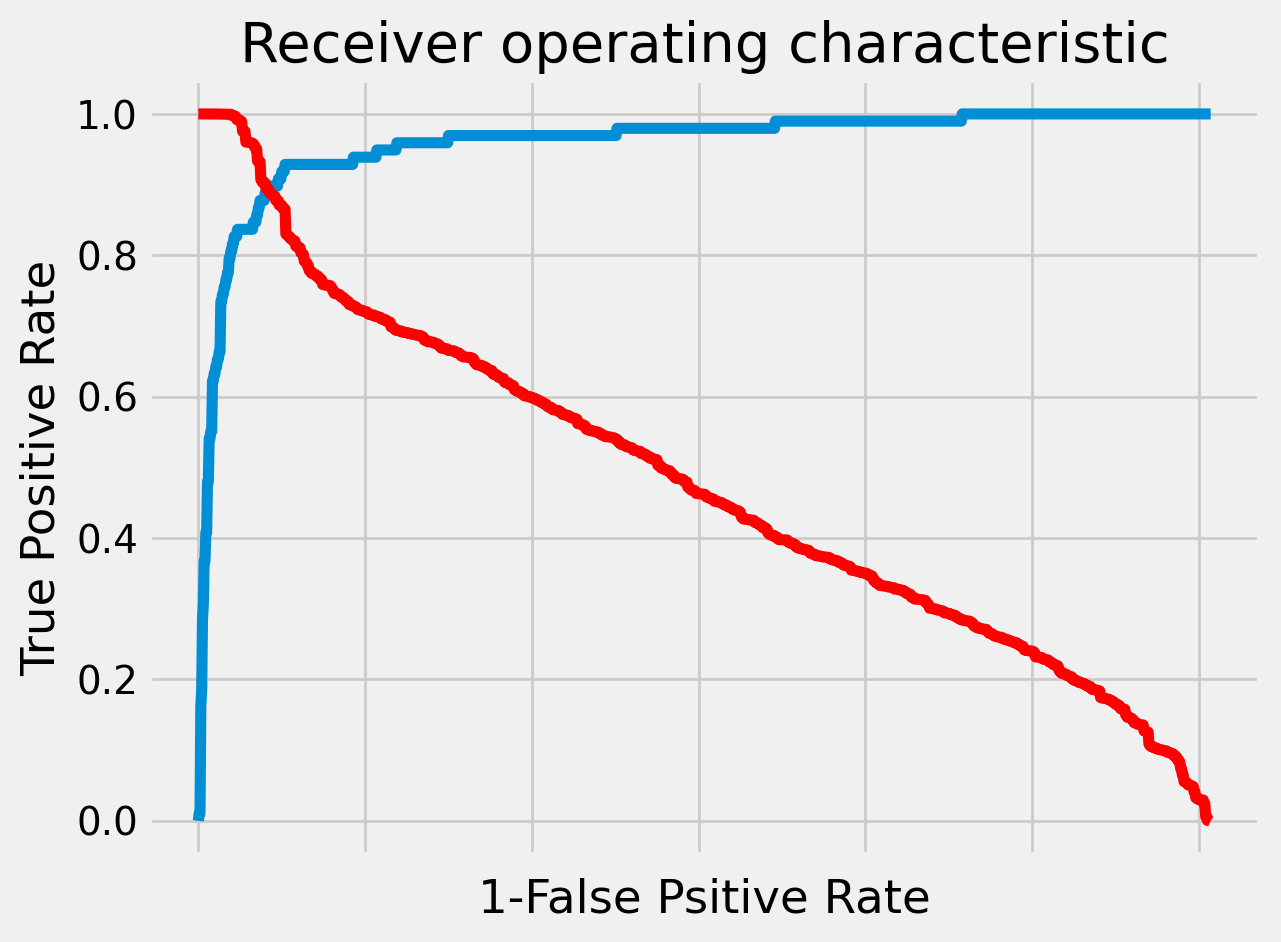

In [83]:
find_optimal_cutoff(Y_test,test_predictions_weighted)

legitimate Transactions Detected (True Negatives) 56834
legitimate Transactions Incorrectly Detected (False Positives) 30
Fradulent Transactions Missed (False Negatives) 20
Fradulent Transactions Detected (True Positives) 78
Total Fradulent Transactions 98


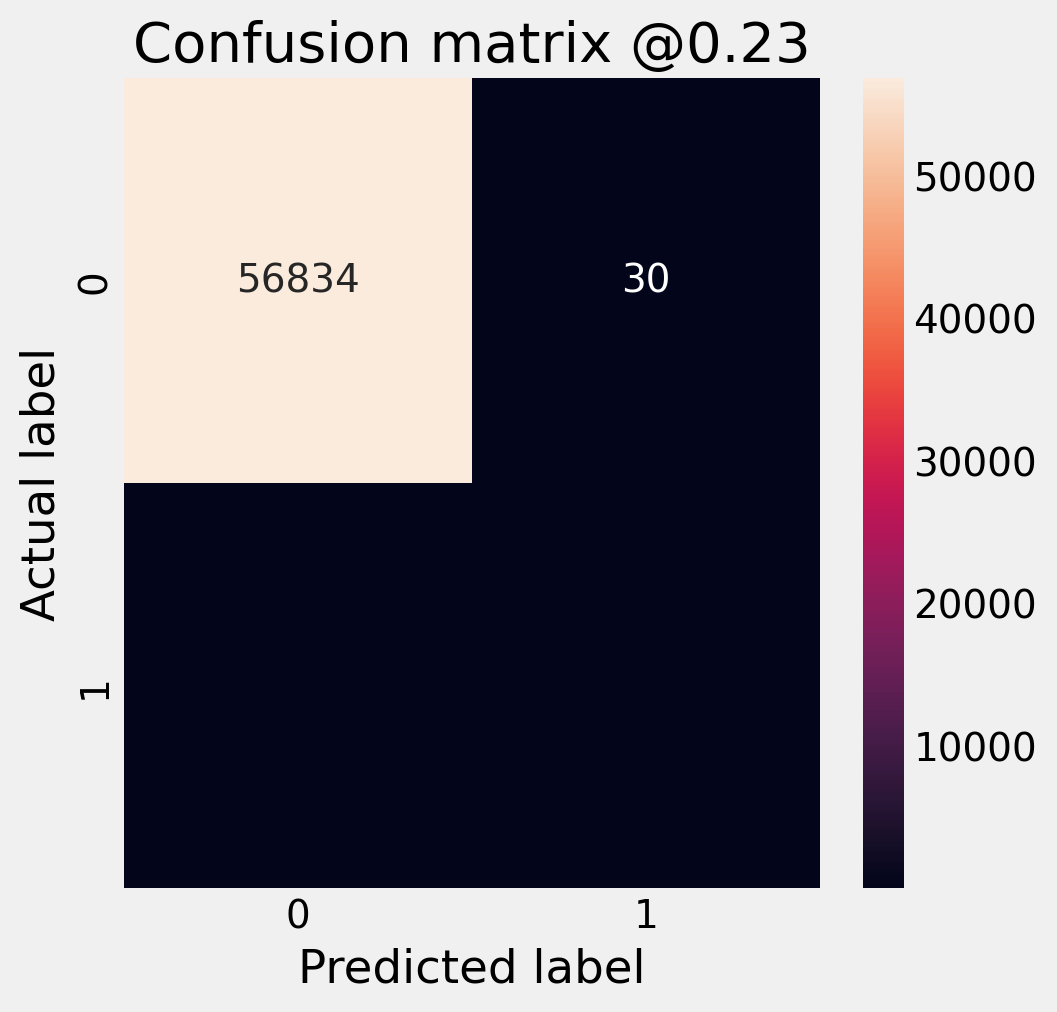

In [84]:
plot_cm(Y_test, test_predictions_weighted, p = 0.23)

In [85]:
print(classification_report(Y_test,test_predictions_weighted>0.21))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.80      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [86]:
roc_auc_score(Y_test,test_predictions_weighted>0.21)

0.8976953963915336